# 支持向量机(Support Vector Machine)

如同逻辑回归一样，SVM是一个分类模型

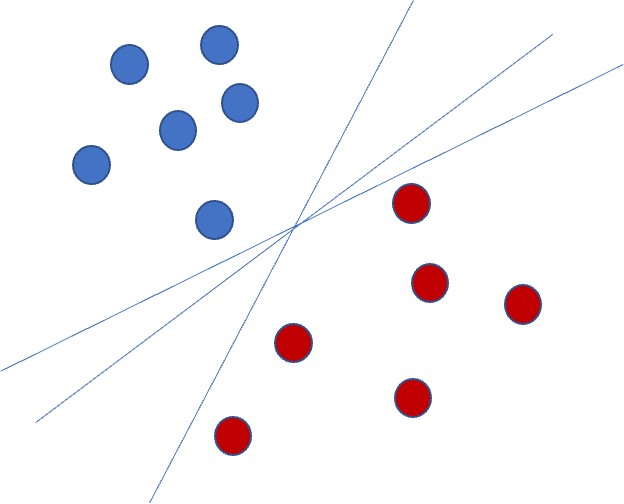

## 目标

SVM解决分类模型的基本思路：什么是一个好的分类边界？

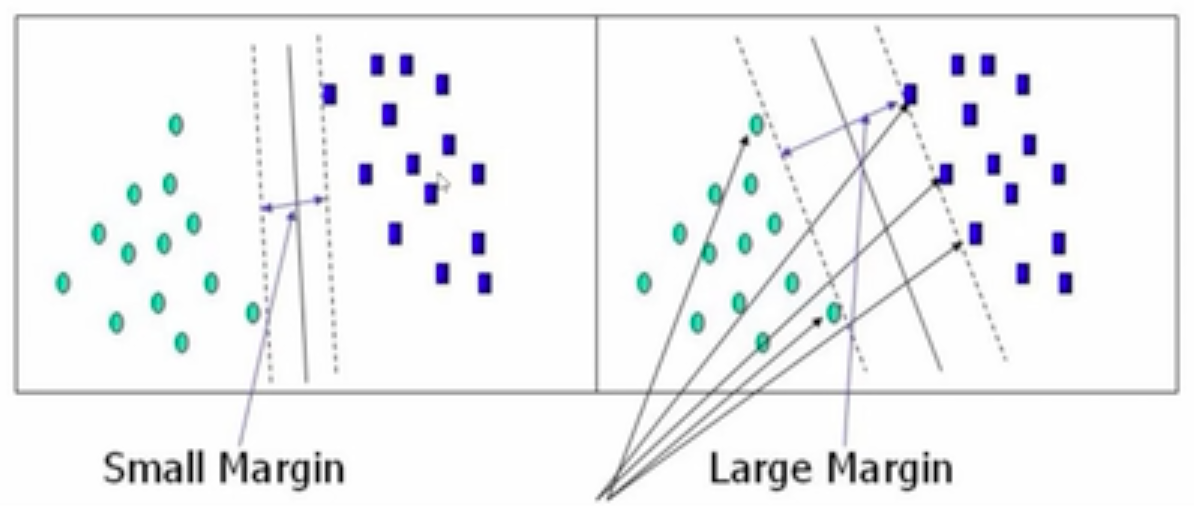

SVM认为，好的分类决策边界应当是：**类别边界的距离应当尽可能的远**

## 目标函数

那么给定一组数据，$(x_1, y_1), (x_2, y_2), (x_3, y_3)$

当x为正样本时，y=1

当x为负样本时，y=-1

给定决策边界$w^\top x + b$

如果$w^\top x_i + b > 0 $, 则认为点在边界之上，$y_i = 1$ 反之， $y_i = -1$

那么从上述过程可以得到

$$y_i(w^\top x_i + b) > 0$$

实际上，一个点$a$到平面$(w^\top x_i + b)$的距离就是

$$d = \frac{1}{||w||}|w^\top x + b|$$

上式可进一步的去除绝对值，得到

$$d = \frac{1}{||w||}y_i(w^\top x_i + b)$$


那么我们的目标就是：

让决策平面距离不同类别的边界点尽可能的远，同时能正确分类样本点

为了方便，我们将条件缩小一些，即令

$$y_i(w^\top x_i + b) \geq 1$$

而后，得到优化目标

$$\max_{w, b}\{\frac{1}{||w||}\min_i[y_i\cdot (w^\top x_i + b)]\}$$

而根据刚刚设定的条件，我们就可以无视后项，只关注前一项。

因此，我们可以得到最终的优化方程形态

$$\max_{w, b} \frac{1}{||w||}$$

$$s.t.  y_i(w^\top x_i + b) \geq 1$$

## 方程求解

先转换成极小值求解问题：

$$\min_{w, b} \frac{1}{2} w^2$$
$$y_i(w^\top x_i + b) \geq 1$$

如何对上述带有约束条件的方程进行求解？

拉格朗日乘子法

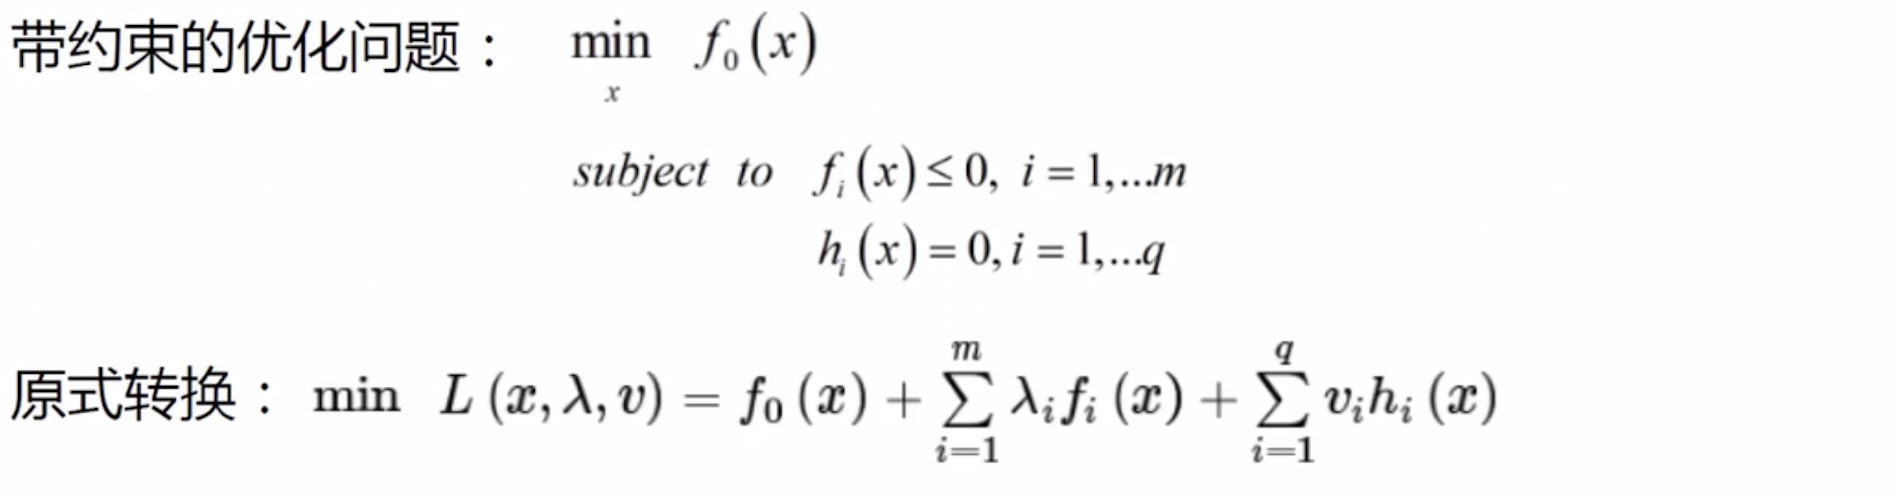

那么我们的公式就可以写为

$$L(w, b, \alpha) = \frac{1}{2}w^2 - \sum_{i=0}^n \alpha_i (y_i(w^\top x_i + b) - 1)$$

因此，目标就转化为求取上式的极值

关于极值的求解，这里可写为(根据对偶性质(kkt定理))

$$\max_\alpha\min_{w, b}L(w, b, \alpha)$$

分别对$w, b$求偏导

$$\frac{\partial L}{\partial w} = w - \sum_{i=0}^n \alpha_iy_ix_i = 0$$

$$\frac{\partial L}{\partial b} = \sum_{i=0}^n \alpha_iy_i = 0$$


因此，根据上述关系，带入原方程有

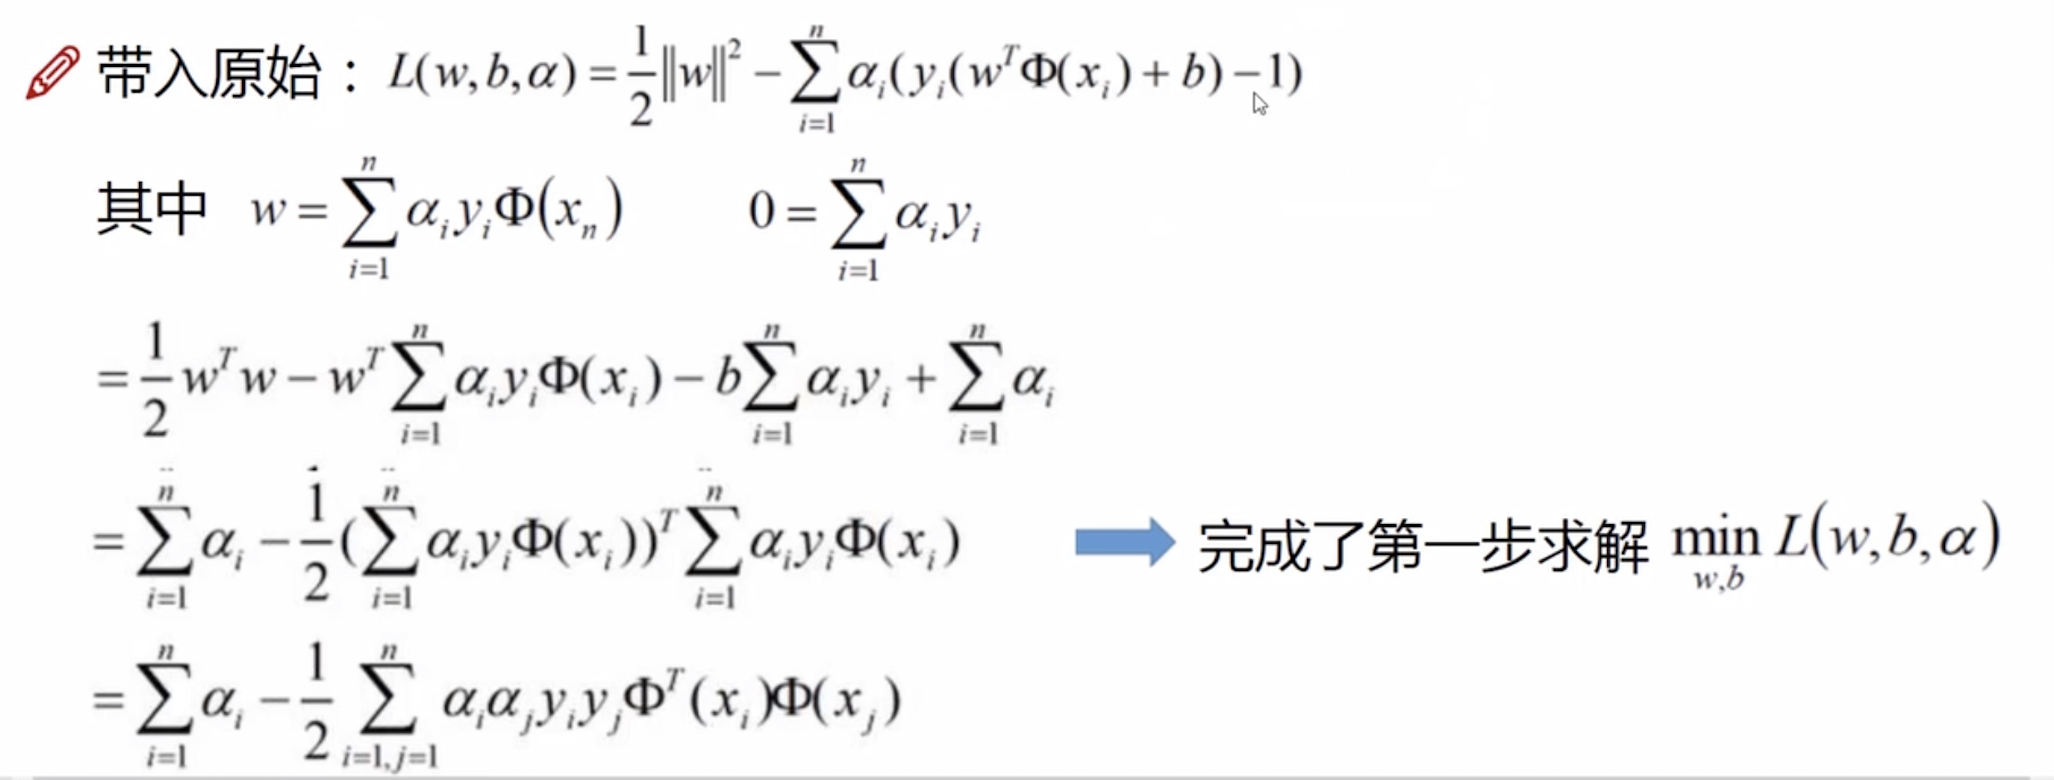

之后，我们来求解$\max_{\alpha}L(\alpha)$

先转化成最小值优化问题，即

$$L(\alpha) = \frac{1}{2}\sum_{i,j}\alpha_i\alpha_jy_iy_jx_ix_j - \sum_{i}\alpha_i$$

同时不要忘记约束：

$$\frac{\partial L}{\partial b} = \sum_{i=0}^n \alpha_iy_i = 0$$
$$\alpha_i \geq 0$$

至此，我们完成了大部分的公式推导，后续就需要带入点的具体数值来确定最终的$\alpha$的值

## 训练



给三个点，$(3, 3, 1), (4, 2, 1), (1, 1, -1)$

求解：

$$L(\alpha) = \frac{1}{2}\sum_{i,j}\alpha_i\alpha_jy_iy_jx_ix_j - \sum_{i}\alpha_i$$
$$\frac{\partial L}{\partial b} = \sum_{i=0}^n \alpha_iy_i = 0$$
$$\alpha_i \geq 0$$

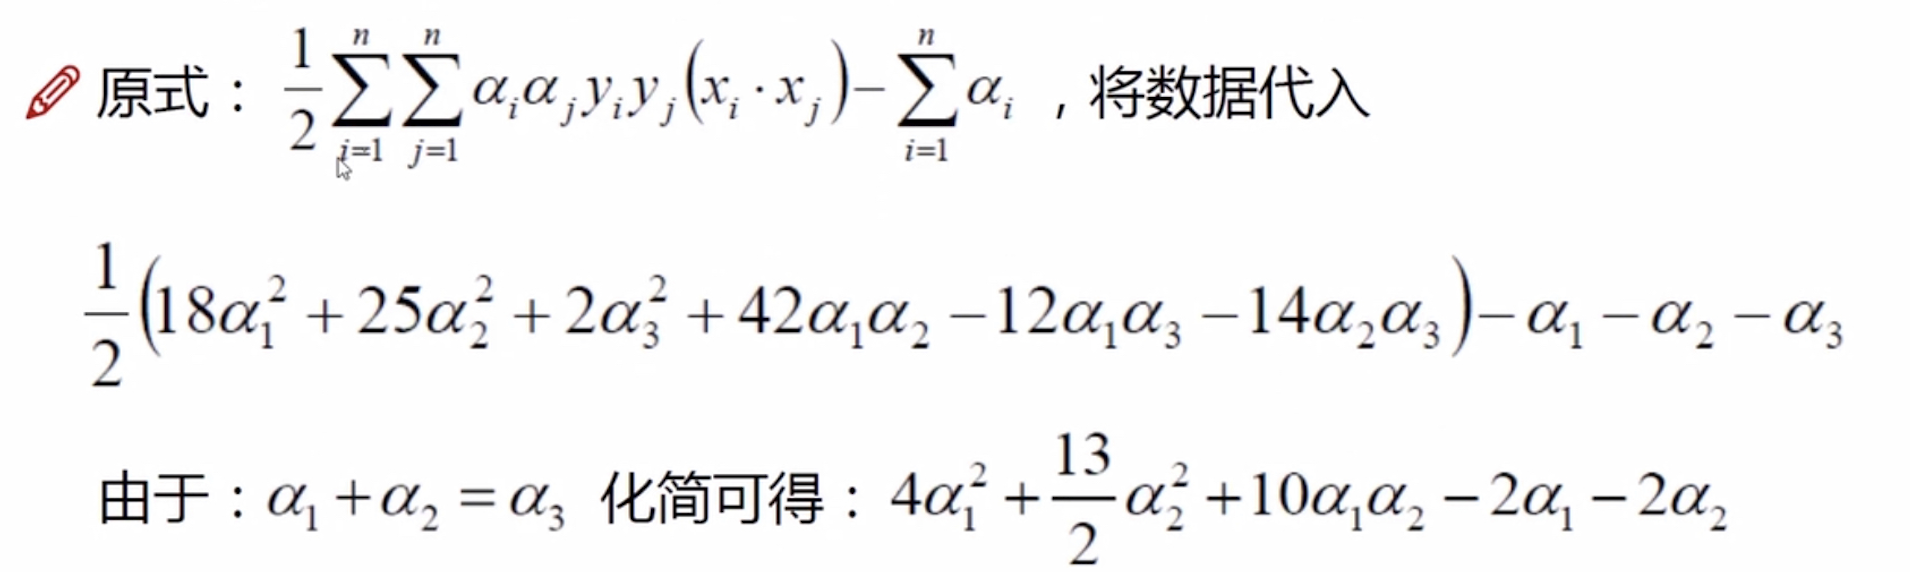

而后，对上式求极值，分别对$\alpha_1$和$\alpha_2$做偏导，令偏导等于0，可得

$$8\alpha_1 + 10\alpha_2 - 2 = 0$$
$$13\alpha_2 + 10\alpha_1 - 2 = 0$$

求取后可得

$\alpha_1 = 1.5$, $\alpha_2 = -1$

然而，该结果并不满足约束条件。

造成的原因是因为点在边界上。应当令$\alpha_1, \alpha_2$中的一个等于0

尝试一下：

令$\alpha_1 = 0$

可以计算出

$\alpha_2 = -\frac{13}{2}$

也不满足

再令$\alpha_2=0$

有$\alpha_1=0.25$

满足条件。

进而，可以得到$\alpha_3 = \alpha_1 = 0.25$

最终，可以得到$\alpha$的值为 $[0.25, 0, 0.25]$

根据$\alpha$我们可以进一步的求解出$w$的值

带入$$\frac{\partial L}{\partial w} = w - \sum_{i=0}^n \alpha_iy_ix_i = 0$$

得到$w = [0.5, 0.5]$

同时，也可以得到$b$的值为$-2$


所以我们的分割平面方程为

$$0.5x_1 + 0.5x_2 - 2 = 0$$

## 小结

svm本质上只关心边界上的点，对于非最近的点根本不关心。

因此，这个分类平面是由这些边界上的点支撑起来的，所以叫支持向量机

## 软间隔

上述过程中，是在将全部点正确分类后，得到最优的平面方程。

然而，由于一些噪声原因，一些outlier会恶化平面方程的最优解。

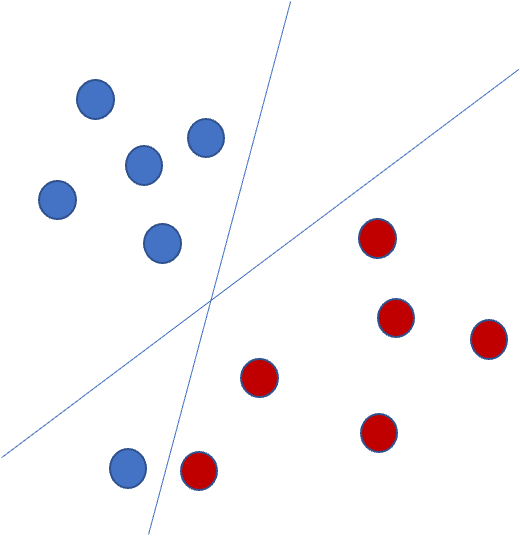

例如，一个噪声点作为边界后，为了正确分类，会极大地减少分类平面与边界点的距离。

对此，我们希望模型可以容忍一定程度的错误训练集预测，从而避免过拟合。

具体上，我们令条件


$$y_i(w^\top x_i + b) \geq 1$$

松弛为


$$y_i(w^\top x_i + b) \geq 1 - \epsilon_i$$

然后，将$\epsilon$作为正则项带入优化方程

$$\min_{w, b} \frac{1}{2} w^2 + \lambda\sum_i\epsilon_i$$
$$y_i(w^\top x_i + b) \geq 1$$

上述方程可以利用交替迭代乘子法求解。

但我们需要先给定一个$\lambda$

$\lambda$是一个超参数，需要调试后手工给定。

- 当$\lambda$很大时，松弛因子会变得很小，表明没有太多的容错空间(训练数据噪声小)
- 反之，松弛因子会变得很大，表明可以有很大的容错空间(训练数据噪声大)

总之，正则项可以视为分割平面的路径宽窄

## 核变换

对于圆形分布的数据，在二维平面上无论如何也无法正确分割。

或者是需要一个极其复杂的模型，来将点分割，从而造成过拟合。

SVM的思路在于，我将数据映射到更高维度的空间后，从更高的维度寻找一个求解平面，从而得到一个更好的结果。

 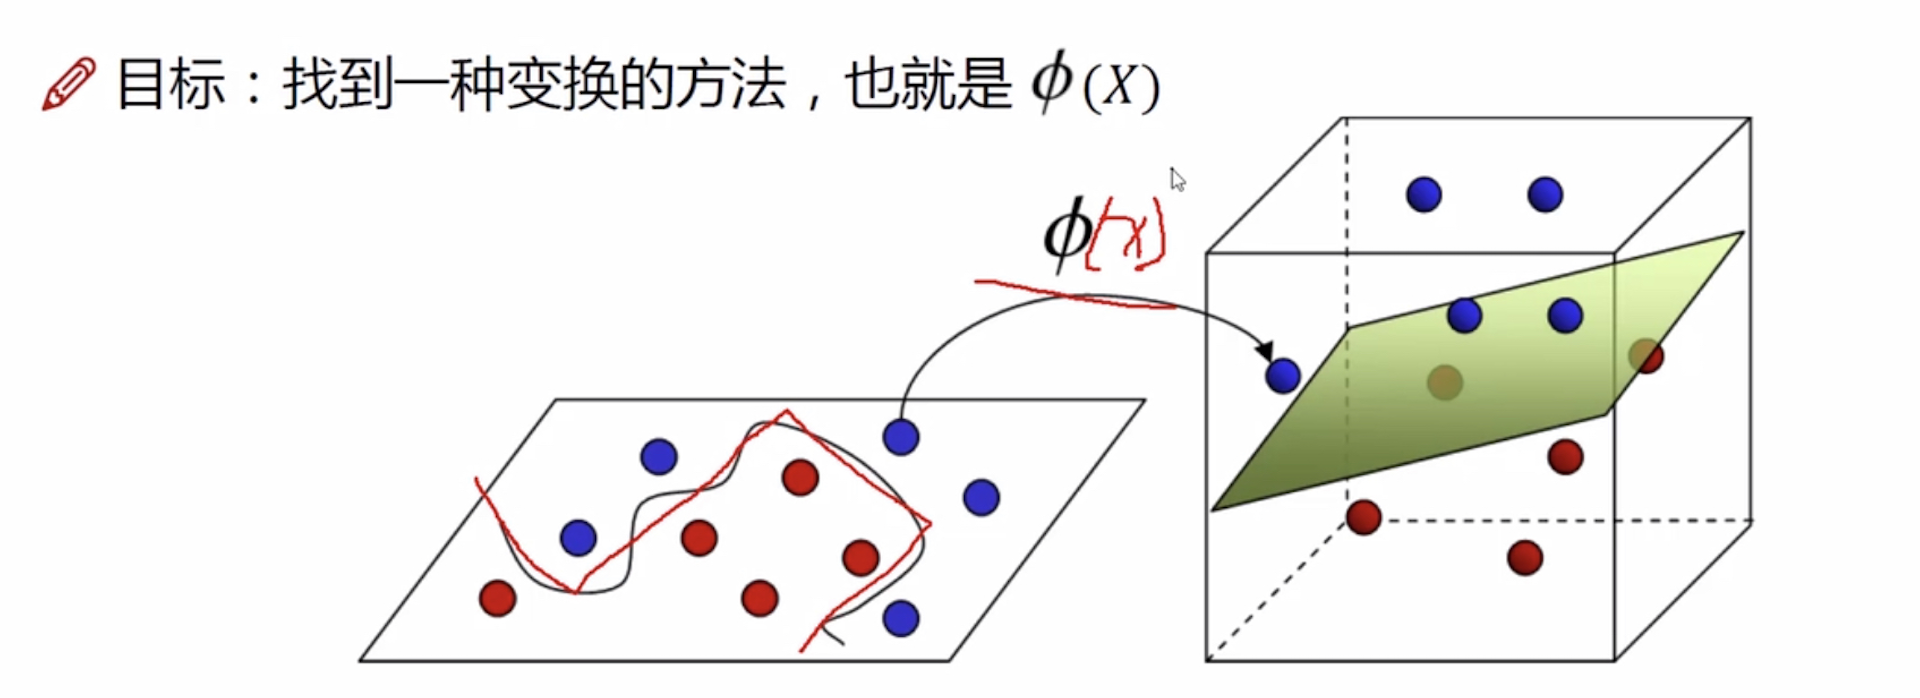

如何映射到高维空间？

就是基于现有数据进行一个数据变换，变换出更多维度的数据。

例如，$(x_1, x_2, x_3)映射到9维空间后，一种映射可举例如下

$$(x_1x_1, x_1x_2, x_1x_3, x_2x_1, x_2x_2, x_2x_3, x_3x_1, x_3x_2, x_3x_3)$$

之后，计算$\alpha$的时候需要算内积，因此计算量很大。

然而，将数据映射后做内积，的结果等于对数据做内积后再映射，从而可以大幅节省计算量。

如(1,2,3),(4,5,6)可验算

我们这里，把 将一个点映射到高维空间 的函数，称为**核函数**

常用的核函数是高斯核函数，即

$$K(x, y) = \exp(-\frac{||x-y||^2}{2\delta^2})$$

也就是说，拿到数据点之后，我们需要先对数据进行高斯核函数处理，映射到高维空间

而后，再进行求解

In [62]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

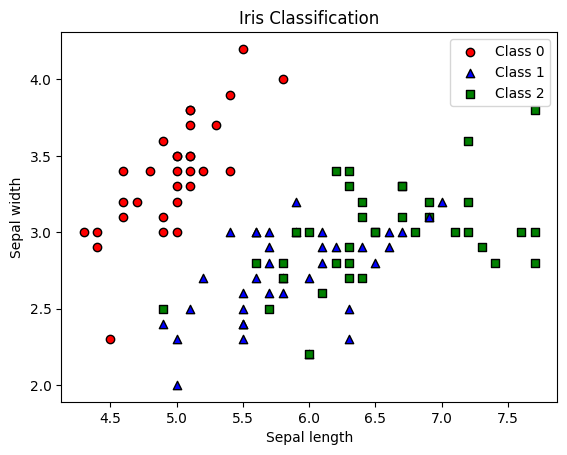

In [63]:
markers = ['o', '^', 's']
marker_colors = ['r', 'b', 'g']
marker_dict = {i: (markers[i], marker_colors[i]) for i in range(len(markers))}

# 绘制散点图，并根据不同类别使用不同的形状进行区分
for i in range(X_train.shape[0]):
    marker, color = marker_dict[y_train[i]]
    plt.scatter(X_train[i, 0], X_train[i, 1], marker=marker, c=color, edgecolor='k')

# 添加图例
handles = [plt.scatter([], [], marker=markers[i], c=marker_colors[i], edgecolor='k') for i in range(len(markers))]
labels = ['Class %d' % i for i in range(len(markers))]
plt.legend(handles, labels)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Classification')
plt.show()

In [84]:
clf1 = SVC(C=1, kernel='linear', decision_function_shape='ovr')
clf1.fit(X_train, y_train.ravel())

clf2 = SVC(C=1, kernel='poly', decision_function_shape='ovr')
clf2.fit(X_train, y_train.ravel())

# poly', 'linear', 'sigmoid', 'rbf', 'precomputed

SVC(C=1, kernel='poly')

In [85]:
print(clf1.score(X_train, y_train))
print(clf2.score(X_train, y_train))

0.819047619047619
0.8095238095238095


In [86]:
print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))

0.8
0.7333333333333333


In [87]:
import matplotlib as mlp

def draw(clf, x):
    iris_feature = 'sepal length', 'sepal width', 'petal lenght', 'petal width'
    # 开始画图
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()               #第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()               #第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]   #生成网格采样点 开始坐标：结束坐标（不包括）：步长
    #flat将二维数组转换成1个1维的迭代器，然后把x1和x2的所有可能值给匹配成为样本点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)            #stack():沿着新的轴加入一系列数组，竖着（按列）增加两个数组，grid_test的shape：(40000, 2)
#     print('grid_test:\n', grid_test)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
#     print('the distance to decision plane:\n', z)

    grid_hat = clf.predict(grid_test)                           # 预测分类值 得到【0,0.。。。2,2,2】
#     print('grid_hat:\n', grid_hat)  
    grid_hat = grid_hat.reshape(x1.shape)                       # reshape grid_hat和x1形状一致
                                                                #若3*3矩阵e，则e.shape()为3*3,表示3行3列   
    #light是网格测试点的配色，相当于背景
    #dark是样本点的配色
    cm_light = mlp.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mlp.colors.ListedColormap(['g', 'b', 'r'])
     #画出所有网格样本点被判断为的分类，作为背景
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)                                   # pcolormesh(x,y,z,cmap)这里参数代入
                                                                                      # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    #squeeze()把y的个数为1的维度去掉，也就是变成一维。
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), edgecolor='k', s=50, cmap=cm_dark) # 样本点
    plt.scatter(X_test[:, 0], X_test[:, 1], s=200, facecolor='yellow', zorder=10, marker='+')       # 测试点
    plt.xlabel(iris_feature[0], fontsize=20)
    plt.ylabel(iris_feature[1], fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('svm in iris data classification', fontsize=30)
    plt.grid()
    plt.show()

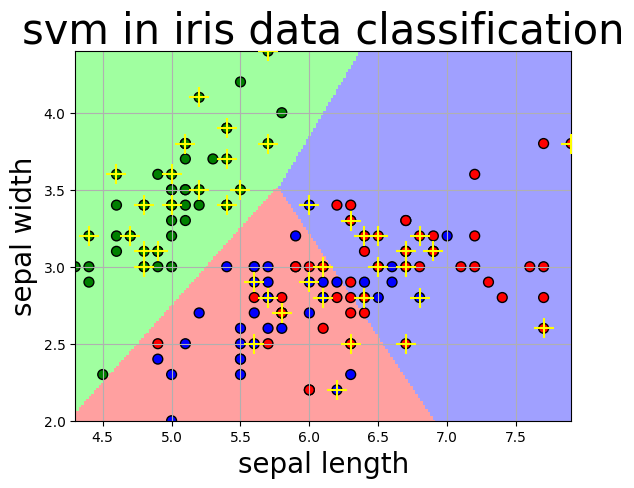

In [88]:
draw(clf1,X)

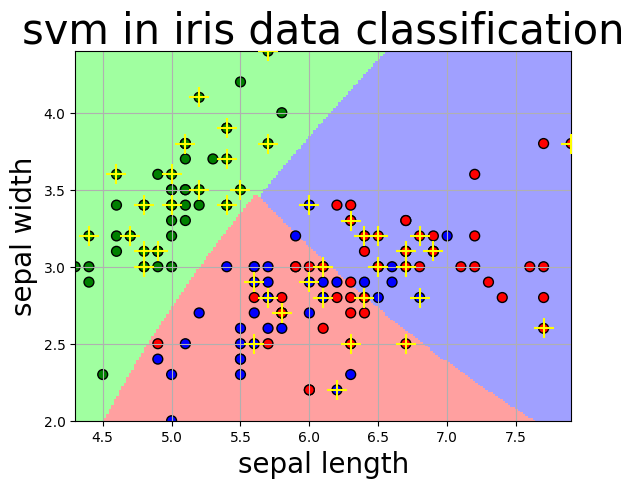

In [89]:
draw(clf2, X)

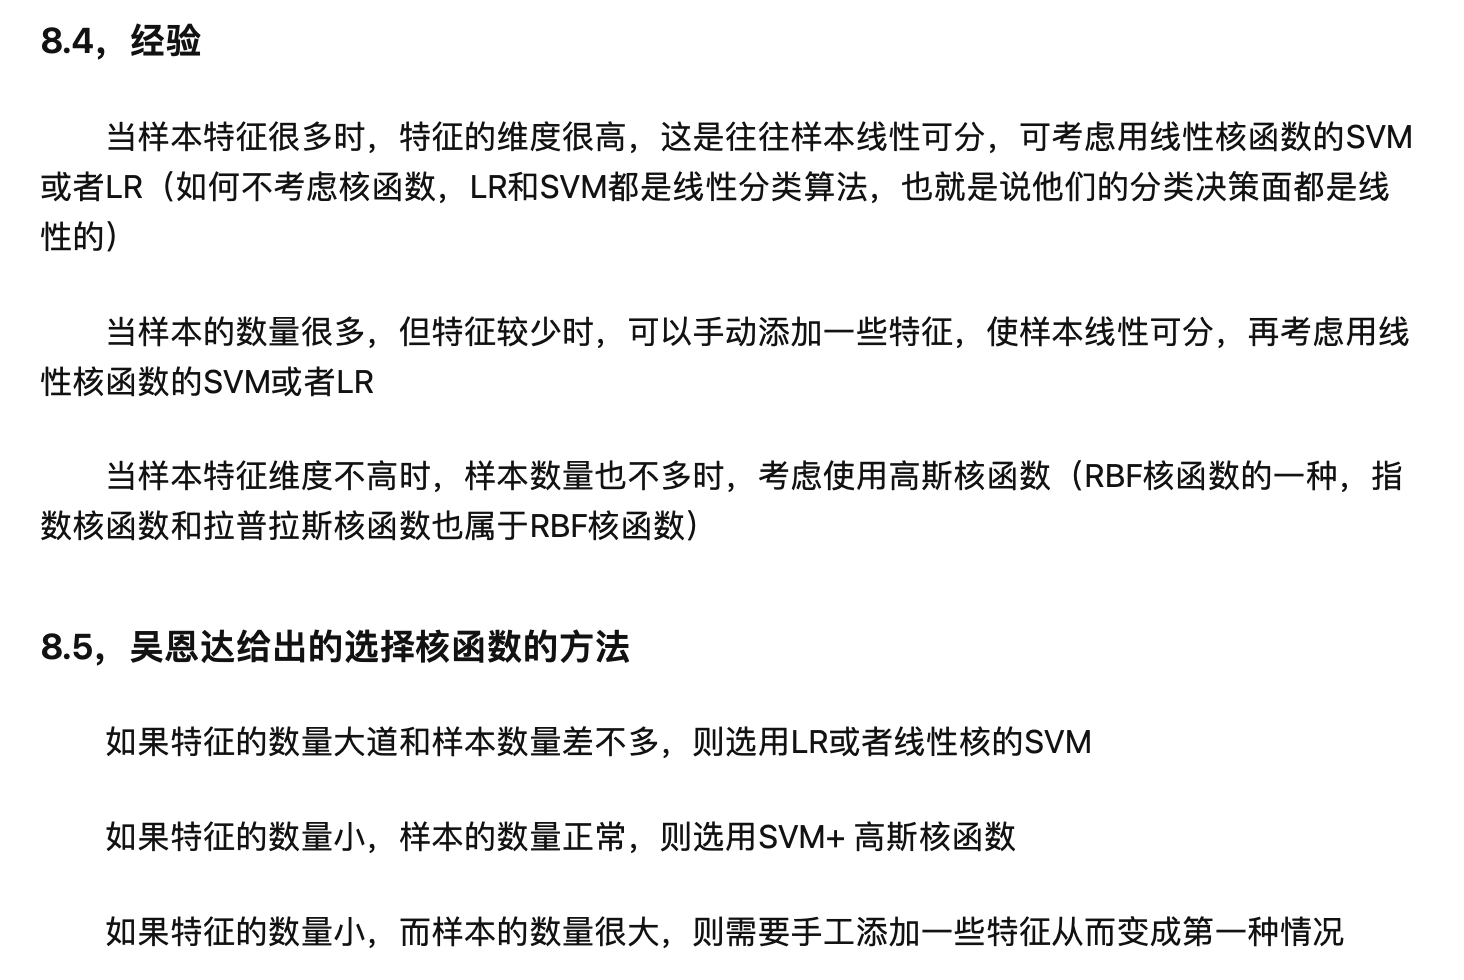